In [1]:
using PyPlot
include("lib/all.jl");

In [2]:
N=2^20
ax = zeros(N)
ay = zeros(N)
az = zeros(N);

particles = make_particles(N);
t = DTree(particles, 12);

In [3]:
@time fill!(t.tree.nodes, Node());

  0.021355 seconds (4.74 k allocations: 210.922 KB)


In [4]:
@time fill!(t.tree.exps, NodeExp());

  0.026450 seconds (4.63 k allocations: 208.969 KB)


In [5]:
@time group!(t);

  0.104070 seconds (110.47 k allocations: 4.571 MB)


In [6]:
@time inform!(t);

  0.265683 seconds (797.95 k allocations: 16.357 MB, 19.89% gc time)


In [7]:
fill!(ax,0.0)
fill!(ay,0.0)
fill!(az,0.0);

In [8]:
@time interact!(t, 0.3, ax, ay, az, 1.0e-3);

In [9]:
ts=Float64[]
for i in 1:12
    tic()
    interact!(t, 0.3, ax, ay, az, 1.0e-3);
    append!(ts, toq())
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 

In [10]:
mean(ts)

0.320208438

In [11]:
@time collect!(t)

  0.271118 seconds (7.69 M allocations: 118.577 MB, 6.90% gc time)


In [12]:
@time accel!(t, ax,ay,az)

  0.100289 seconds (64.91 k allocations: 2.364 MB)


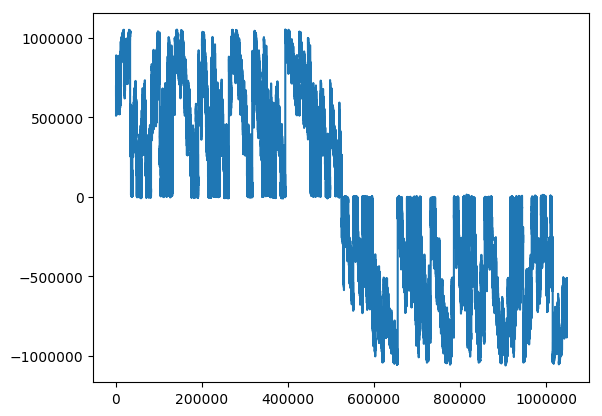

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa7388e7b8>

In [16]:
plot(ax)

In [17]:
mean(abs(ax))/1e5

5.159396159772407

In [18]:
mx,myd,e50,e90,e95,e99,m,s = perf(particles, ax,ay,az, 10000, 1.0e-3)
print(myd)

mean(abs(rax)) = 514012.4327448534
[0.0,0.0,2.0,1.0,0.0,8.0,9.0,22.0,37.0,117.0,277.0,510.0,960.0,1445.0,1925.0,1901.0,1459.0,706.0,362.0,136.0,66.0,36.0,14.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

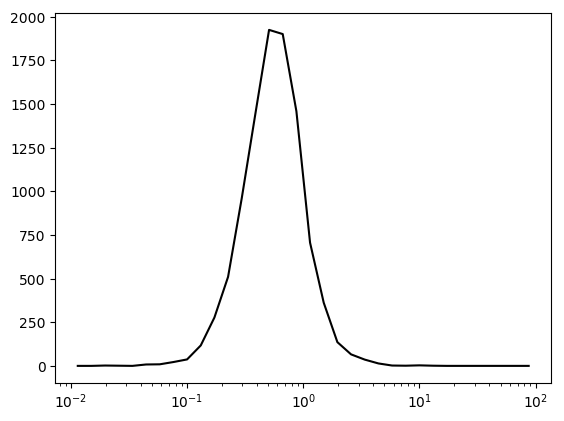

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa737fefd0>

In [19]:
semilogx(10.^mx,myd,"-k")

In [20]:
e50

0.557402247921091

In [21]:
e90

1.110179350771233

In [22]:
e99

2.444048960495067

In [20]:
e50

0.5498493611557039

In [21]:
e90

1.1468925642330627

In [22]:
e99

2.3842028589730466

In [13]:
function doall(t, ax,ay,az, alpha, eps2)
    total_mass = t.trees[1].total_mass
    for it in t.trees
        fill!(it.exps, NodeExp());
        it.total_mass = total_mass
    end
    tic()
    group!(t)
    t_group = toq()
    tic()
    inform!(t)
    t_inf = toq()
    fill!(ax,0.0)
    fill!(ay,0.0)
    fill!(az,0.0)
    tic()
    interact!(t, alpha, ax, ay, az, eps2)
    t_int = toq()
    tic()
    collect!(t)
    t_coll = toq()
    tic()
    accel!(t,ax,ay,az)
    t_acc = toq()
    t_group, t_inf, t_int, t_coll, t_acc
end

doall (generic function with 1 method)

In [14]:
s_g = Float64[]
s_inf = Float64[]
s_int = Float64[]
s_coll = Float64[]
s_acc = Float64[]
s_all = Float64[]
for i in 1:20
    tic()
    t_group, t_inf, t_int, t_coll, t_acc = doall(t, ax, ay, az, 0.3, 1.0e-3);
    t_all = toq()
    append!(s_g, t_group)
    append!(s_inf, t_inf)
    append!(s_int, t_int)
    append!(s_coll, t_coll)
    append!(s_acc, t_acc)
    append!(s_all, t_all)
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 

In [15]:
@show mean(s_g)
@show mean(s_inf)
@show mean(s_int)
@show mean(s_coll)
@show mean(s_acc)
@show mean(s_all);

mean(s_g) = 0.0429145237
mean(s_inf) = 0.02580254945
mean(s_int) = 0.3155535953
mean(s_coll) = 0.0938294793
mean(s_acc) = 0.01607863095
mean(s_all) = 0.5128930913
